In [28]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web

### Get finance data

In [5]:
style.use('ggplot')

start = dt.datetime(2015, 1, 1)
end = dt.datetime.now()

In [6]:
df = web.DataReader('TSLA', 'morningstar', start, end)
df.head()

Close    High       Low    Open   Volume
Symbol Date                                                 
TSLA   2015-01-01  222.41  222.41  222.4100  222.41        0
       2015-01-02  219.31  223.25  213.2600  222.63  4764443
       2015-01-05  210.09  216.50  207.1626  214.50  5368477
       2015-01-06  211.28  214.20  204.2100  210.06  6261936
       2015-01-07  210.95  214.78  209.7800  213.40  2968390

In [7]:
df.reset_index(inplace=True)
df.set_index("Date", inplace=True)
df = df.drop("Symbol", axis=1)

df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-01-01,222.41,222.41,222.4100,222.41,0
2015-01-02,219.31,223.25,213.2600,222.63,4764443
2015-01-05,210.09,216.50,207.1626,214.50,5368477
2015-01-06,211.28,214.20,204.2100,210.06,6261936
2015-01-07,210.95,214.78,209.7800,213.40,2968390


In [8]:
df.to_csv('tsla.csv')

### Read from csv

In [9]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-01-01,222.41,222.41,222.4100,222.41,0
2015-01-02,219.31,223.25,213.2600,222.63,4764443
2015-01-05,210.09,216.50,207.1626,214.50,5368477
2015-01-06,211.28,214.20,204.2100,210.06,6261936
2015-01-07,210.95,214.78,209.7800,213.40,2968390


### Visualize

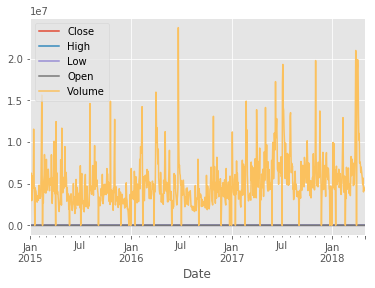

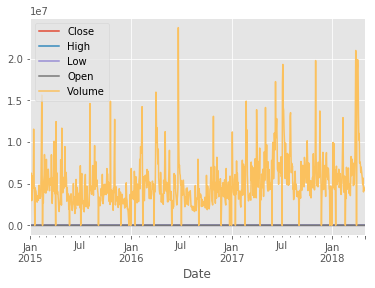

In [11]:
df.plot()
plt.show()

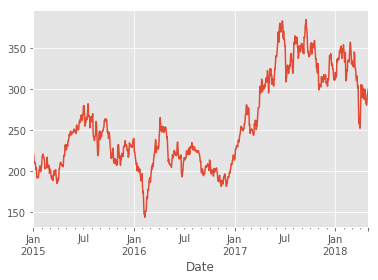

In [12]:
df['Close'].plot()
plt.show()

### 100MA

In [13]:
df['100ma'] = df['Close'].rolling(window=100, min_periods=0).mean()

In [15]:
df.tail()

,Close,High,Low,Open,Volume,100ma
Date,,,,,,
2018-04-25,280.690,285.16,277.25,283.50,4013574,321.39955
2018-04-26,285.480,285.79,276.50,278.75,4356013,321.14195
2018-04-27,294.075,294.47,283.83,285.37,4364626,320.93140
2018-04-30,293.900,298.73,292.50,293.61,4228172,320.58130
2018-05-01,299.920,300.82,293.22,293.51,4576823,320.17020


In [16]:
#df.dropna(inplace=True)

In [17]:
df.head()

,Close,High,Low,Open,Volume,100ma
Date,,,,,,
2015-05-20,244.350,247.74,241.3721,247.12,3755569,209.59675
2015-05-21,245.620,246.62,242.3574,243.17,1970643,209.82885
2015-05-22,247.730,248.60,245.0100,245.38,2223089,210.11305
2015-05-25,247.730,247.73,247.7300,247.73,0,210.48945
2015-05-26,247.455,252.00,246.5000,247.68,3498682,210.85120


In [21]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

In [22]:
ax1.plot(df.index, df['Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

<Container object of 770 artists>

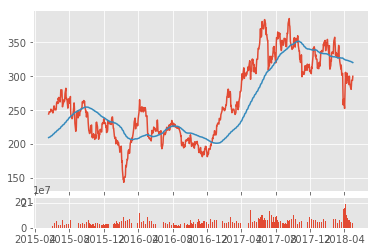

In [23]:
plt.show()

### More manipulation

In [24]:
df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

In [30]:
df_ohlc = df['Close'].resample('10D').ohlc()
df_volumn = df['Volume'].resample('10D').sum()

df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

print(df_ohlc.head())

       Date    open    high     low    close
0  735599.0  222.41  222.41  206.66  206.660
1  735609.0  202.21  204.25  191.87  191.930
2  735619.0  196.57  206.55  196.57  203.600
3  735629.0  210.94  220.99  210.94  217.480
4  735639.0  216.29  216.29  202.88  211.705


In [31]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

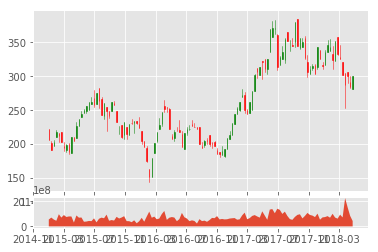

In [32]:
candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volumn.index.map(mdates.date2num), df_volumn.values, 0)
plt.show()